In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus=False)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [3]:
temp = pd.read_csv(r'C:\\sqlite\\mysql\\code\\AI\\matp\\data\\소상공인시장진흥공단_상가(상권)정보_강원_202309.csv', encoding='utf-8')
temp.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0084547,금강산노래광장,NaN,I2,음식,I211,주점,I21101,일반 유흥 주점,I56211,...,4217010300007470000000086,파크장,강원특별자치도 동해시 송정로 11,240806,25789,NaN,지,NaN,129.127525,37.495265
1,MA010120220805430826,에이치속눈썹수강아카데미,NaN,S2,수리·개인,S207,이용·미용,S20702,피부 관리실,S96113,...,4211039021110620001000001,NaN,강원특별자치도 춘천시 동내면 외솔길19번길 80-36,200883,24401,NaN,NaN,NaN,127.758764,37.857831
2,MA010120220805430903,엔젤,NaN,I2,음식,I201,한식,I20101,백반/한정식,I55109,...,4277032022103660000008290,NaN,강원특별자치도 정선군 남면 민둥산로 175-13,233837,26148,NaN,NaN,NaN,128.792089,37.259788
3,MA010120220805430941,누베헤어,NaN,S2,수리·개인,S207,이용·미용,S20701,미용실,S96112,...,4211012500100440010000008,춘천파크자이,강원특별자치도 춘천시 스포츠타운길 460,200200,24472,NaN,3,NaN,127.707653,37.867744
4,MA010120220805430946,공차,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,...,4213033023113500001000001,NaN,강원특별자치도 원주시 지정면 신지정로 211,220821,26354,NaN,NaN,NaN,127.872713,37.374189


In [4]:
from glob import glob # 모든csv 파일 읽기
filename = glob('C:\\sqlite\\mysql\\code\\AI\\matp\\data\\*.csv')

total = pd.DataFrame()

In [5]:
for file_name in filename:
    temp = pd.read_csv(file_name)
    total = pd.concat([total, temp]) # 데이터 결합

In [6]:
total.reset_index(inplace=True, drop=True)

In [7]:
data_columns = ['상가업소번호', '상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '시도명', '시군구명', '행정동명', '경도', '위도']
data = total[data_columns] 

In [8]:
del total

In [9]:
set(data['상권업종중분류명'])

{'가구 소매',
 '가전·통신 소매',
 '가전제품 수리',
 '가정용품 대여',
 '고용 알선',
 '광고',
 '교육 지원',
 '구내식당·뷔페',
 '기술 서비스',
 '기타 가정용품 수리',
 '기타 간이',
 '기타 개인',
 '기타 교육',
 '기타 보건',
 '기타 사업 서비스',
 '기타 상품 소매',
 '기타 생활용품 소매',
 '기타 숙박',
 '기타 외국',
 '기타 전문 과학',
 '담배 소매',
 '도서관·사적지',
 '동남아시아',
 '모터사이클 소매',
 '모터사이클 수리',
 '법무관련 ',
 '병원',
 '본사·경영 컨설팅',
 '부동산 서비스',
 '비알코올 ',
 '사무 지원',
 '사진 촬영',
 '산업용품 대여',
 '서양식',
 '섬유·의복·신발 소매',
 '세탁',
 '수의',
 '스포츠 서비스',
 '시계·귀금속 소매',
 '시설관리',
 '시장 조사',
 '식료품 소매',
 '식물 소매',
 '안경·정밀기기 소매',
 '애완동물·용품 소매',
 '여행사·보조',
 '연료 소매',
 '오락용품 소매',
 '욕탕·신체관리',
 '운송장비 대여',
 '유원지·오락',
 '음료 소매',
 '의약·화장품 소매',
 '의원',
 '이용·미용',
 '인쇄·제품제작',
 '일반 교육',
 '일반 숙박',
 '일식',
 '자동차 부품 소매',
 '자동차 수리·세차',
 '장례식장 ',
 '장식품 소매',
 '전문 디자인',
 '조경·유지',
 '종합 소매',
 '주점',
 '중고 상품 소매',
 '중식',
 '철물·건설자재 소매',
 '청소·방제',
 '컴퓨터 수리',
 '통신장비 수리',
 '한식',
 '회계·세무'}

In [10]:
df_coffe = data[data['상권업종중분류명']=='구내식당·뷔페']

In [11]:
df_coffe.index = range(len(df_coffe))

In [12]:
len(df_coffe)

5158

In [13]:
set(data['시도명'])

{'강원특별자치도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시'}

In [14]:
df_seoul_coffe = df_coffe[df_coffe['시도명']=='강원특별자치도']
df_seoul_coffe.index = range(len(df_seoul_coffe))
len(df_seoul_coffe)
df_seoul_coffe.head()

,상가업소번호,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,경도,위도
0,MA010120220805456014,아워홈근로복지공단정,NaN,음식,구내식당·뷔페,강원특별자치도,정선군,정선읍,128.660296,37.383254
1,MA010120220805696936,JJfood제이제이푸드,NaN,음식,구내식당·뷔페,강원특별자치도,원주시,문막읍,127.842740,37.333684
2,MA010120220805816228,가람푸드써비스국립횡성숲체원지점,NaN,음식,구내식당·뷔페,강원특별자치도,횡성군,둔내면,128.286667,37.537224
3,MA010120220806026750,녹원잔치뷔페,NaN,음식,구내식당·뷔페,강원특별자치도,철원군,동송읍,127.221061,38.209518
4,MA010120220806373131,아워홈한림성심대학교,NaN,음식,구내식당·뷔페,강원특별자치도,춘천시,동면,127.756701,37.897779


In [15]:
df_starbucks = df_coffe[df_coffe['상호명'].str.contains('제이푸드')]
df_starbucks.index = range(len(df_starbucks))
len(df_starbucks)
df_starbucks.head()

,상가업소번호,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,경도,위도
0,MA010120220805696936,JJfood제이제이푸드,NaN,음식,구내식당·뷔페,강원특별자치도,원주시,문막읍,127.842740,37.333684
1,MA010120220807999097,에스제이푸드,NaN,음식,구내식당·뷔페,경기도,김포시,통진읍,126.603571,37.707435
2,MA010120220808492802,더제이푸드,NaN,음식,구내식당·뷔페,경기도,광명시,소하1동,126.893977,37.444712
3,MA010120220803548166,엠제이푸드,NaN,음식,구내식당·뷔페,경기도,안산시 단원구,초지동,126.799115,37.305222
4,MA010120220804307030,에스엔제이푸드,NaN,음식,구내식당·뷔페,경기도,광명시,일직동,126.888369,37.419664


In [16]:
df_seoul_starbucks = df_starbucks[df_starbucks['시도명']=='경기도']
df_seoul_starbucks.index = range(len(df_seoul_starbucks))
len(df_seoul_starbucks)
df_seoul_starbucks.head()

,상가업소번호,상호명,지점명,상권업종대분류명,상권업종중분류명,시도명,시군구명,행정동명,경도,위도
0,MA010120220807999097,에스제이푸드,NaN,음식,구내식당·뷔페,경기도,김포시,통진읍,126.603571,37.707435
1,MA010120220808492802,더제이푸드,NaN,음식,구내식당·뷔페,경기도,광명시,소하1동,126.893977,37.444712
2,MA010120220803548166,엠제이푸드,NaN,음식,구내식당·뷔페,경기도,안산시 단원구,초지동,126.799115,37.305222
3,MA010120220804307030,에스엔제이푸드,NaN,음식,구내식당·뷔페,경기도,광명시,일직동,126.888369,37.419664
4,MA0106202301A0610983,에스엔제이푸드청점,장안구,음식,구내식당·뷔페,경기도,수원시 장안구,조원2동,127.010308,37.304023


In [17]:
df_seoul_starbucks['시군구명'].value_counts()

시군구명
광명시        2
수원시 영통구    2
김포시        1
안산시 단원구    1
수원시 장안구    1
이천시        1
수원시 권선구    1
Name: count, dtype: int64

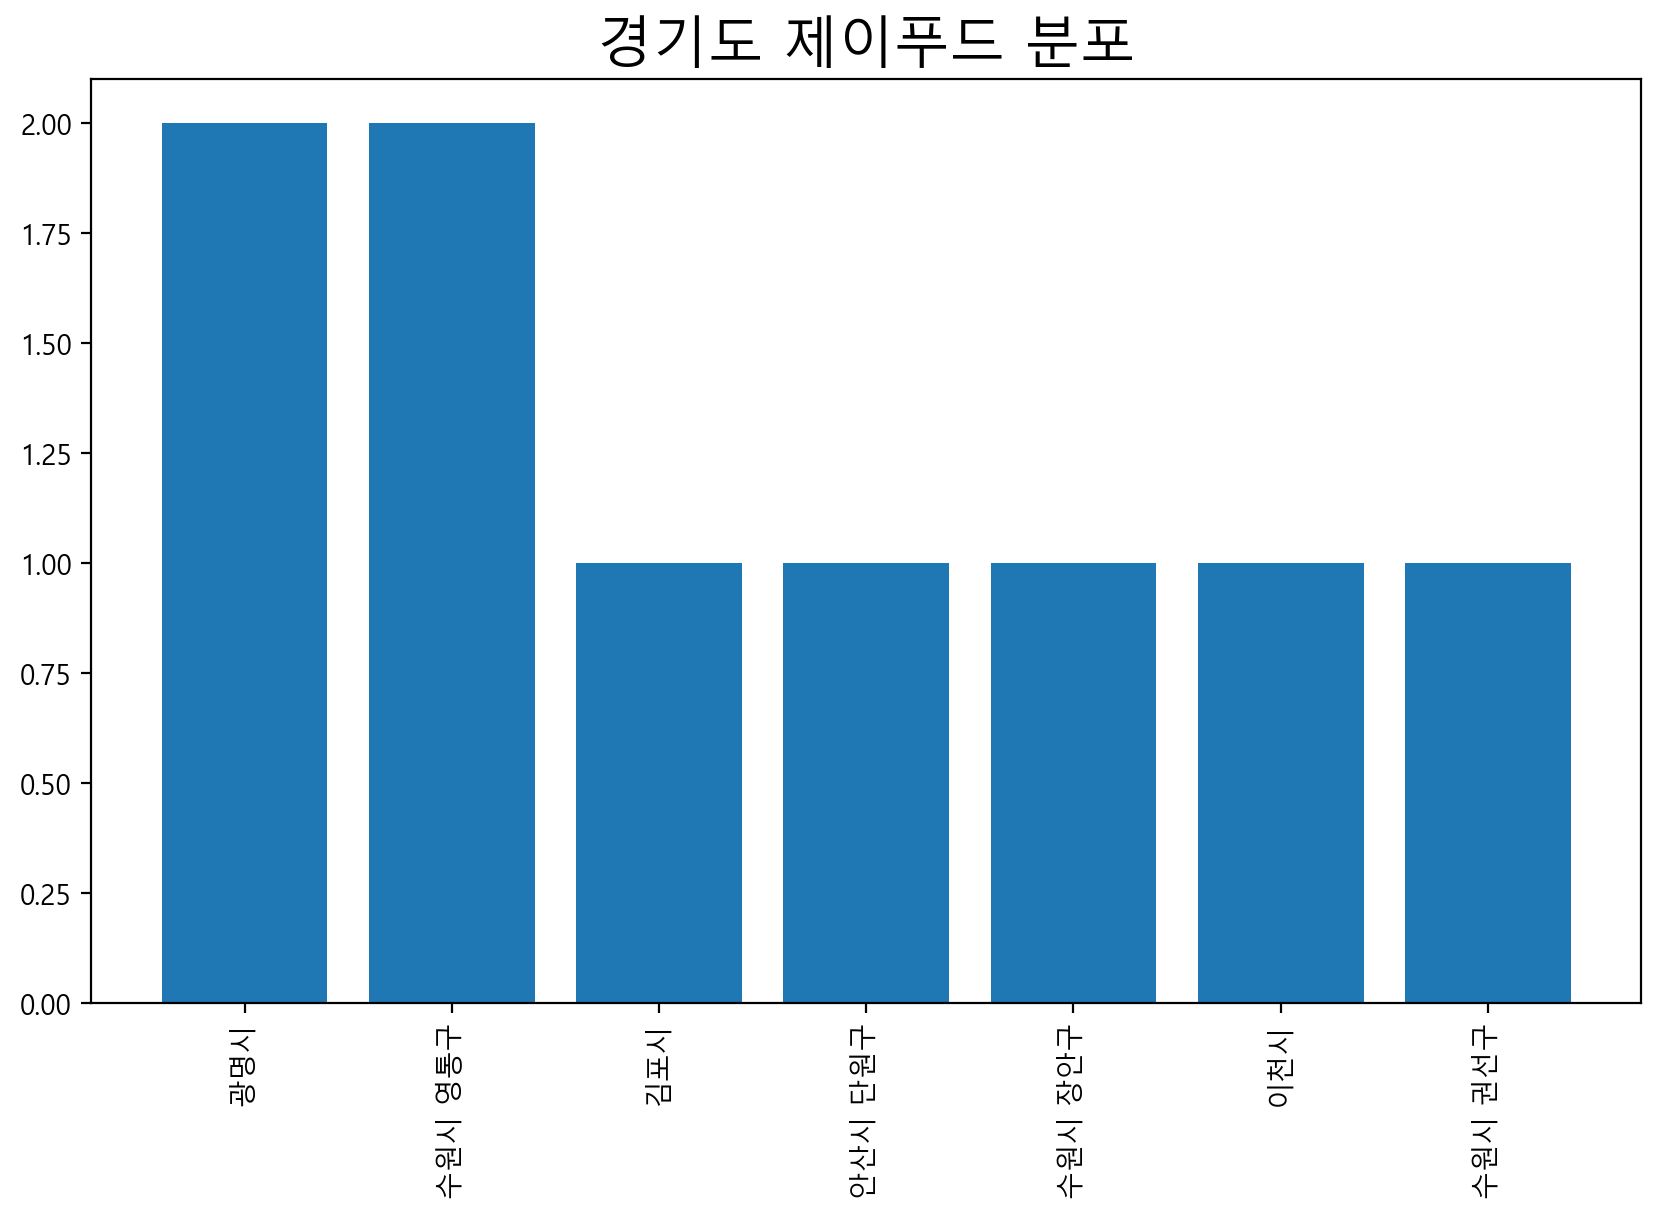

In [18]:
plt.figure(figsize=(10, 6))
plt.title('경기도 제이푸드 분포', fontdict={'fontsize':20})
plt.bar(df_seoul_starbucks['시군구명'].value_counts().index, df_seoul_starbucks['시군구명'].value_counts().values)
plt.xticks(rotation='vertical')
plt.show()

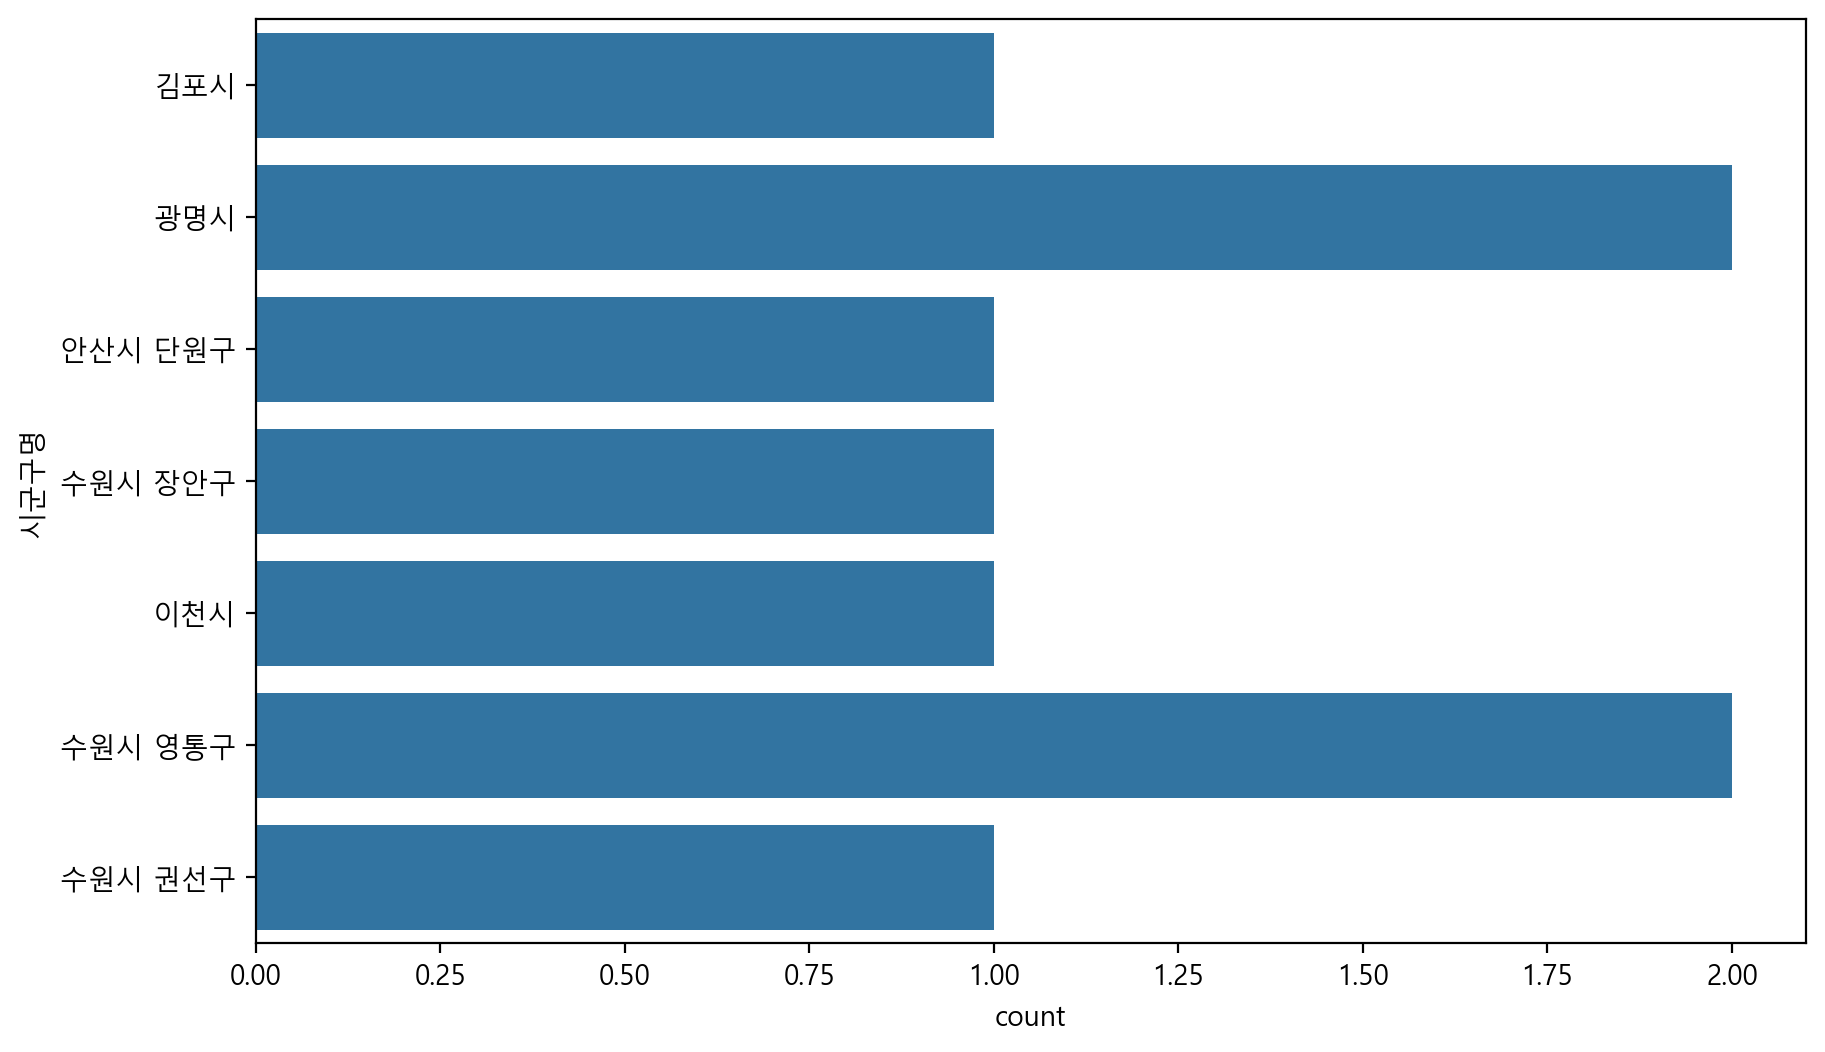

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data = df_seoul_starbucks, y='시군구명')
plt.show()

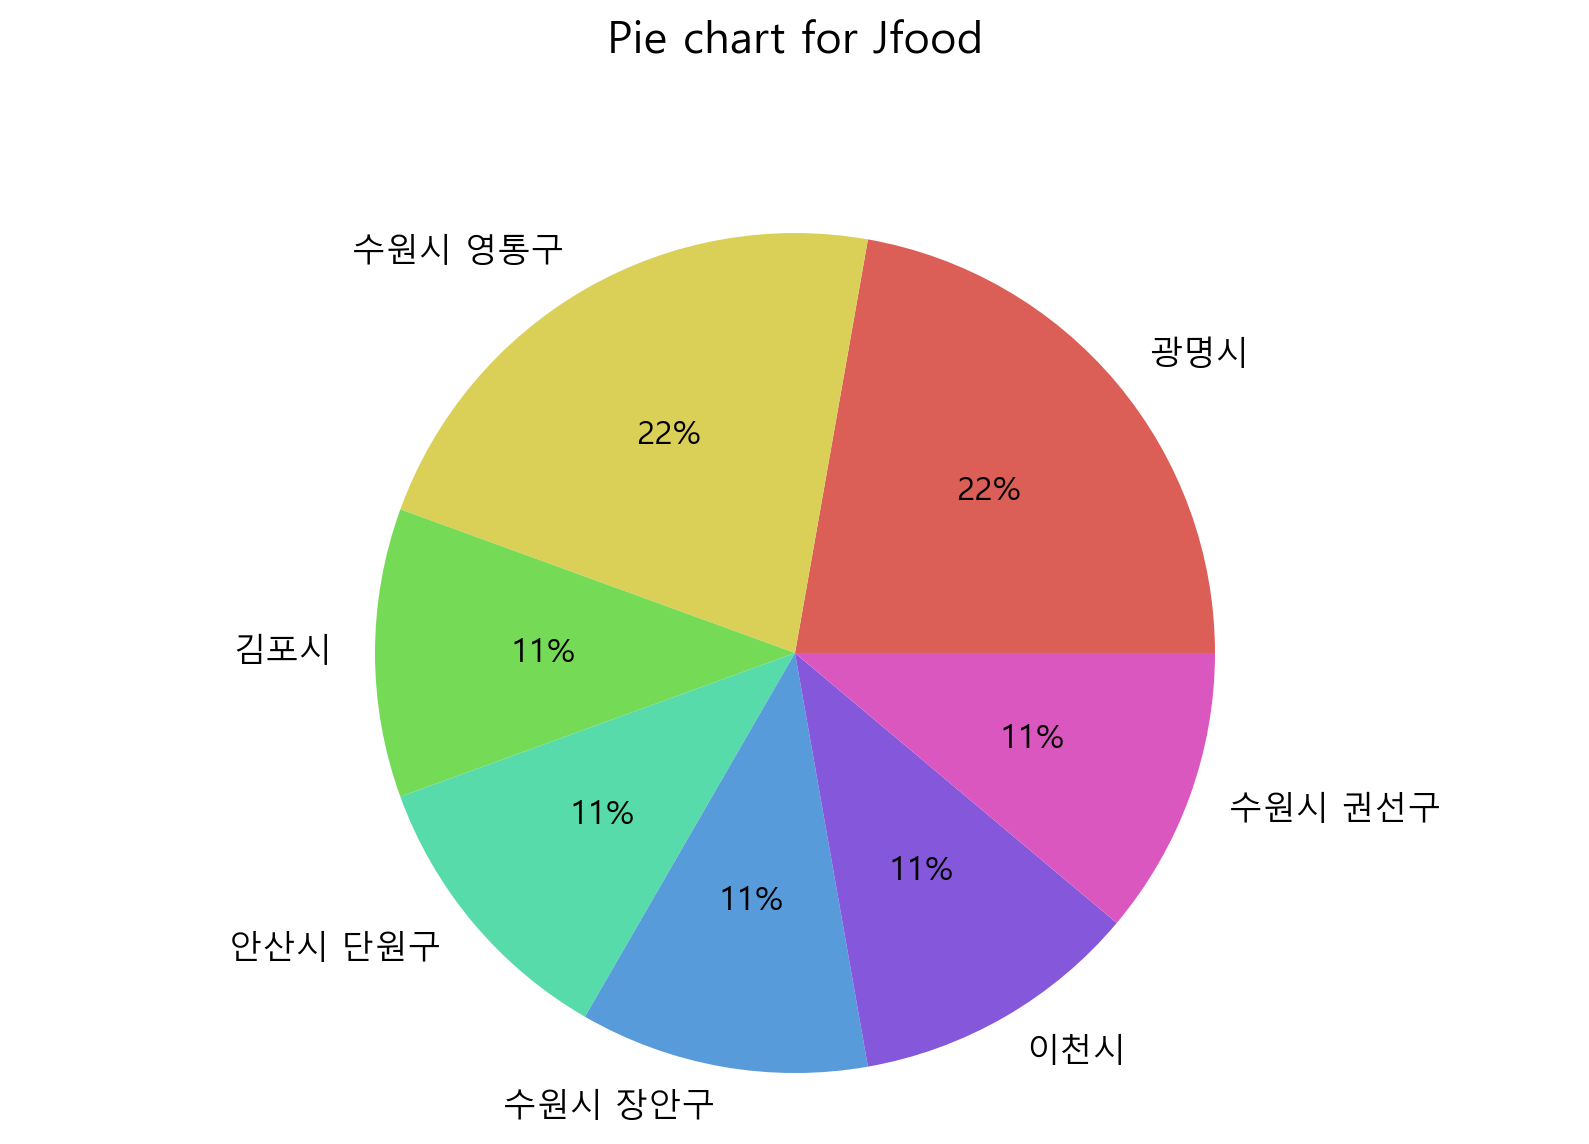

In [20]:
plt.figure(figsize=(10, 6))
plt.pie(df_seoul_starbucks['시군구명'].value_counts().values,
        labels=df_seoul_starbucks['시군구명'].value_counts().index,
        autopct='%d%%',
        colors=sns.color_palette('hls',len(df_seoul_starbucks['시군구명'].value_counts().index)),
        textprops={'fontsize':12})
plt.axis('equal')
plt.title('Pie chart for Jfood', fontsize=16, pad=50)
plt.show()

In [21]:
df_seoul_starbucks[['지점명','경도','위도']]

,지점명,경도,위도
0,NaN,126.603571,37.707435
1,NaN,126.893977,37.444712
2,NaN,126.799115,37.305222
3,NaN,126.888369,37.419664
4,장안구,127.010308,37.304023
5,NaN,127.374285,37.260929
6,NaN,127.046713,37.300158
7,NaN,127.051069,37.273026
8,NaN,126.980076,37.243898


In [22]:
import folium

lat = df_seoul_starbucks['위도'].mean()
long = df_seoul_starbucks['경도'].mean()

m = folium.Map([lat, long], zoom_start=11)

for i in df_seoul_starbucks.index:
    sub_lat = df_seoul_starbucks.loc[i, '위도']
    sub_long = df_seoul_starbucks.loc[i, '경도']
    title = df_seoul_starbucks.loc[i, '지점명']

    folium.Marker([sub_lat, sub_long], tooltip=title).add_to(m)

m